In [1]:
import pymc as pm
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
a, b, c = 0, 1, 0

In [20]:
@pm.stochastic(dtype=float)
def Z(value=c, a=a, b=b, c=c):
    ## dam log(probabilitate) in loc de probabilitate pt ca asa functioneaza pm.mcmc
    def logp(value, a, b, c):
        if a <= value < c:
            return np.log(2 * (value - a)/((b - a) * (c - a)))
        if value == c:
            return np.log(2/(b - a))
        if c < value <= b:
            return np.log(2 * (b - value) / ((b - a) * (b - c)))
        return -np.inf
    
    def random(a, b, c):
        return np.random.triangular(a, c, b)

In [21]:
model = pm.Model([Z])
mcmc = pm.MCMC(model)

In [22]:
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 1.3 sec

In [23]:
Z_samples = mcmc.trace(Z)[:]

In [24]:
abs(Z_samples).mean()

0.3328111421464364

(array([5806., 5051., 4465., 3822., 3293., 2713., 1978., 1549.,  973.,
         350.]),
 array([1.89905406e-05, 9.95541927e-02, 1.99089395e-01, 2.98624597e-01,
        3.98159799e-01, 4.97695001e-01, 5.97230204e-01, 6.96765406e-01,
        7.96300608e-01, 8.95835810e-01, 9.95371012e-01]),
 <a list of 10 Patch objects>)

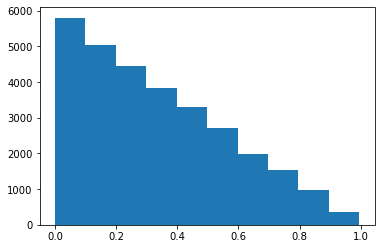

In [25]:
plt.hist(Z_samples)

In [26]:
##validation
X1 = pm.Uniform('X1', lower=0, upper=1)
X2 = pm.Uniform('X2', lower=0, upper=1)

In [33]:
##validation
@pm.deterministic
def Z_sim(X1=X1, X2=X2):
    return abs(X1 - X2)

In [48]:
##validation
model = pm.Model([Z_sim, X1, X2])
mcmc = pm.MCMC(model)

C:\Users\eugen\anaconda3\envs\prob-prog\lib\site-packages\pymc\MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


In [49]:
##validation
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 1.7 sec

In [50]:
##validation
Z_samples_sim = mcmc.trace(Z_sim)[:]

(array([1.94437073, 1.69152886, 1.49528338, 1.27994918, 1.10279242,
        0.90855628, 0.66241221, 0.51874445, 0.32584787, 0.11721146]),
 array([1.89905406e-05, 9.95541927e-02, 1.99089395e-01, 2.98624597e-01,
        3.98159799e-01, 4.97695001e-01, 5.97230204e-01, 6.96765406e-01,
        7.96300608e-01, 8.95835810e-01, 9.95371012e-01]),
 <a list of 1 Patch objects>)

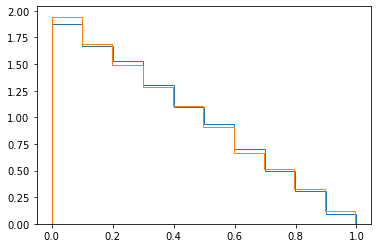

In [51]:
##validation
plt.hist(Z_samples_sim, density=True, histtype='step')
plt.hist(Z_samples, density=True, histtype='step')

In [52]:
Z_samples_sim

array([0.01863   , 0.17003165, 0.07014731, ..., 0.30967917, 0.19453684,
       0.53021261])